<div>
<img src='https://upload.wikimedia.org/wikipedia/commons/6/64/Sharif_University_Logo.jpg' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 6: Practical - Beyond Linearity <br> <br>
<font color=686880 size=4>
    TAs: Amirhossein Ramazani - Arman Malekzadeh - Arshia Soltani Moakhar
    
____

### Full Name : Kian Omoomi
### Student Number : 98110062
### Colab Link:
___

# Intro

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town<br>
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
- INDUS - proportion of non-retail business acres per town.<br>
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
- NOX - nitric oxides concentration (parts per 10 million)<br>
- RM - average number of rooms per dwelling<br>
- AGE - proportion of owner-occupied units built prior to 1940<br>
- DIS - weighted distances to five Boston employment centres<br>
- RAD - index of accessibility to radial highways<br>
- TAX - full-value property-tax rate per `$`10,000<br>
- PTRATIO - pupil-teacher ratio by town<br>
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
- LSTAT - % lower status of the population<br>
- MEDV - Median value of owner-occupied homes in $1000's<br>

# Libraries

In [2]:
# You can use thes following packages

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import itertools

# Sec 1: Data Exploration and Preprocessing (30)

Download the dataset

In [2]:
!wget https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

--2023-05-23 19:52:08--  https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35735 (35K) [text/plain]
Saving to: 'BostonHousing.csv.1'

     0K .......... .......... .......... ....                 100%  250K=0.1s

2023-05-23 19:52:09 (250 KB/s) - 'BostonHousing.csv.1' saved [35735/35735]



Load the dataset as a dataframe **(S1-1: 2 points)**

In [3]:
df = pd.read_csv('./BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


For each of the features, check the number of unique values **(S1-2: 2 points)**

In [4]:
for col in df.columns:
    print(col, len(df[col].unique()))

crim 504
zn 26
indus 76
chas 2
nox 81
rm 446
age 356
dis 412
rad 9
tax 66
ptratio 46
b 357
lstat 455
medv 229


Check if there are any null values in the dataframe (and remove them if they exist) **(S1-3: 2 points)**

In [5]:
print(df.isnull().sum())
df = df.dropna()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


We want to predict prices. Therefore, we'll have `medv` as our target. Make a list of the features other than the target. **(S1-4: 2 points)**

In [6]:
X = df.drop('medv', axis=1)
X = X.values

Plot a boxplot for each of the features **(S1-5: 2 points)**

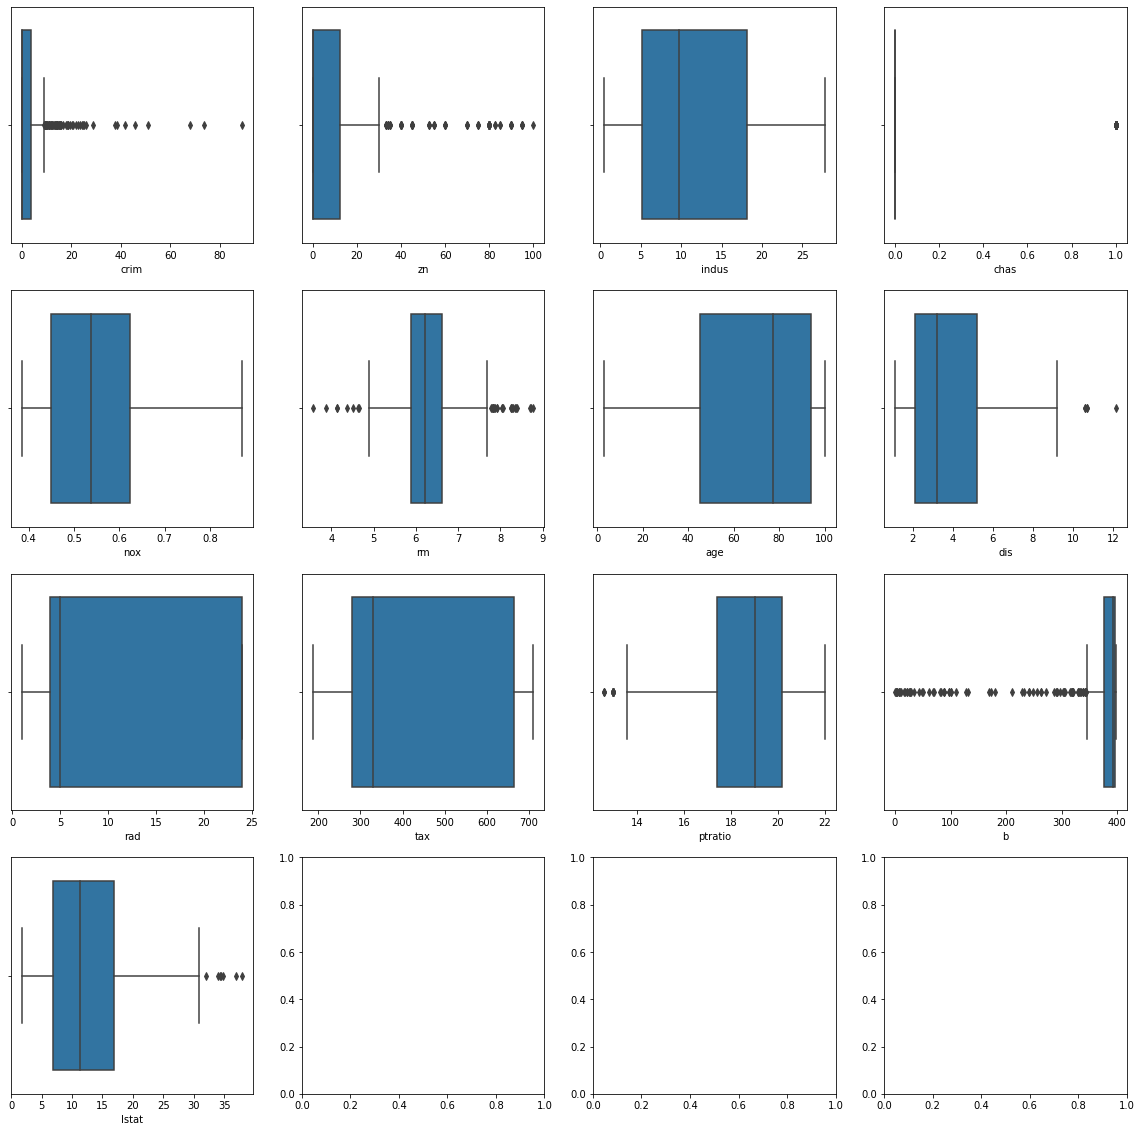

In [7]:
# medv column is not included
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    if i < 13:
        sns.boxplot(x=df.columns[i], data=df, ax=ax)
plt.show()

Plot the historgram of the target **(S1-6: 5 points)**

<AxesSubplot:xlabel='medv', ylabel='Count'>

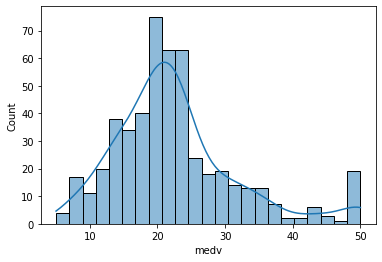

In [8]:
sns.histplot(df['medv'], kde=True)

Have a look at the pair-plot of the dataframe's columns **(S1-7: 5 points)**

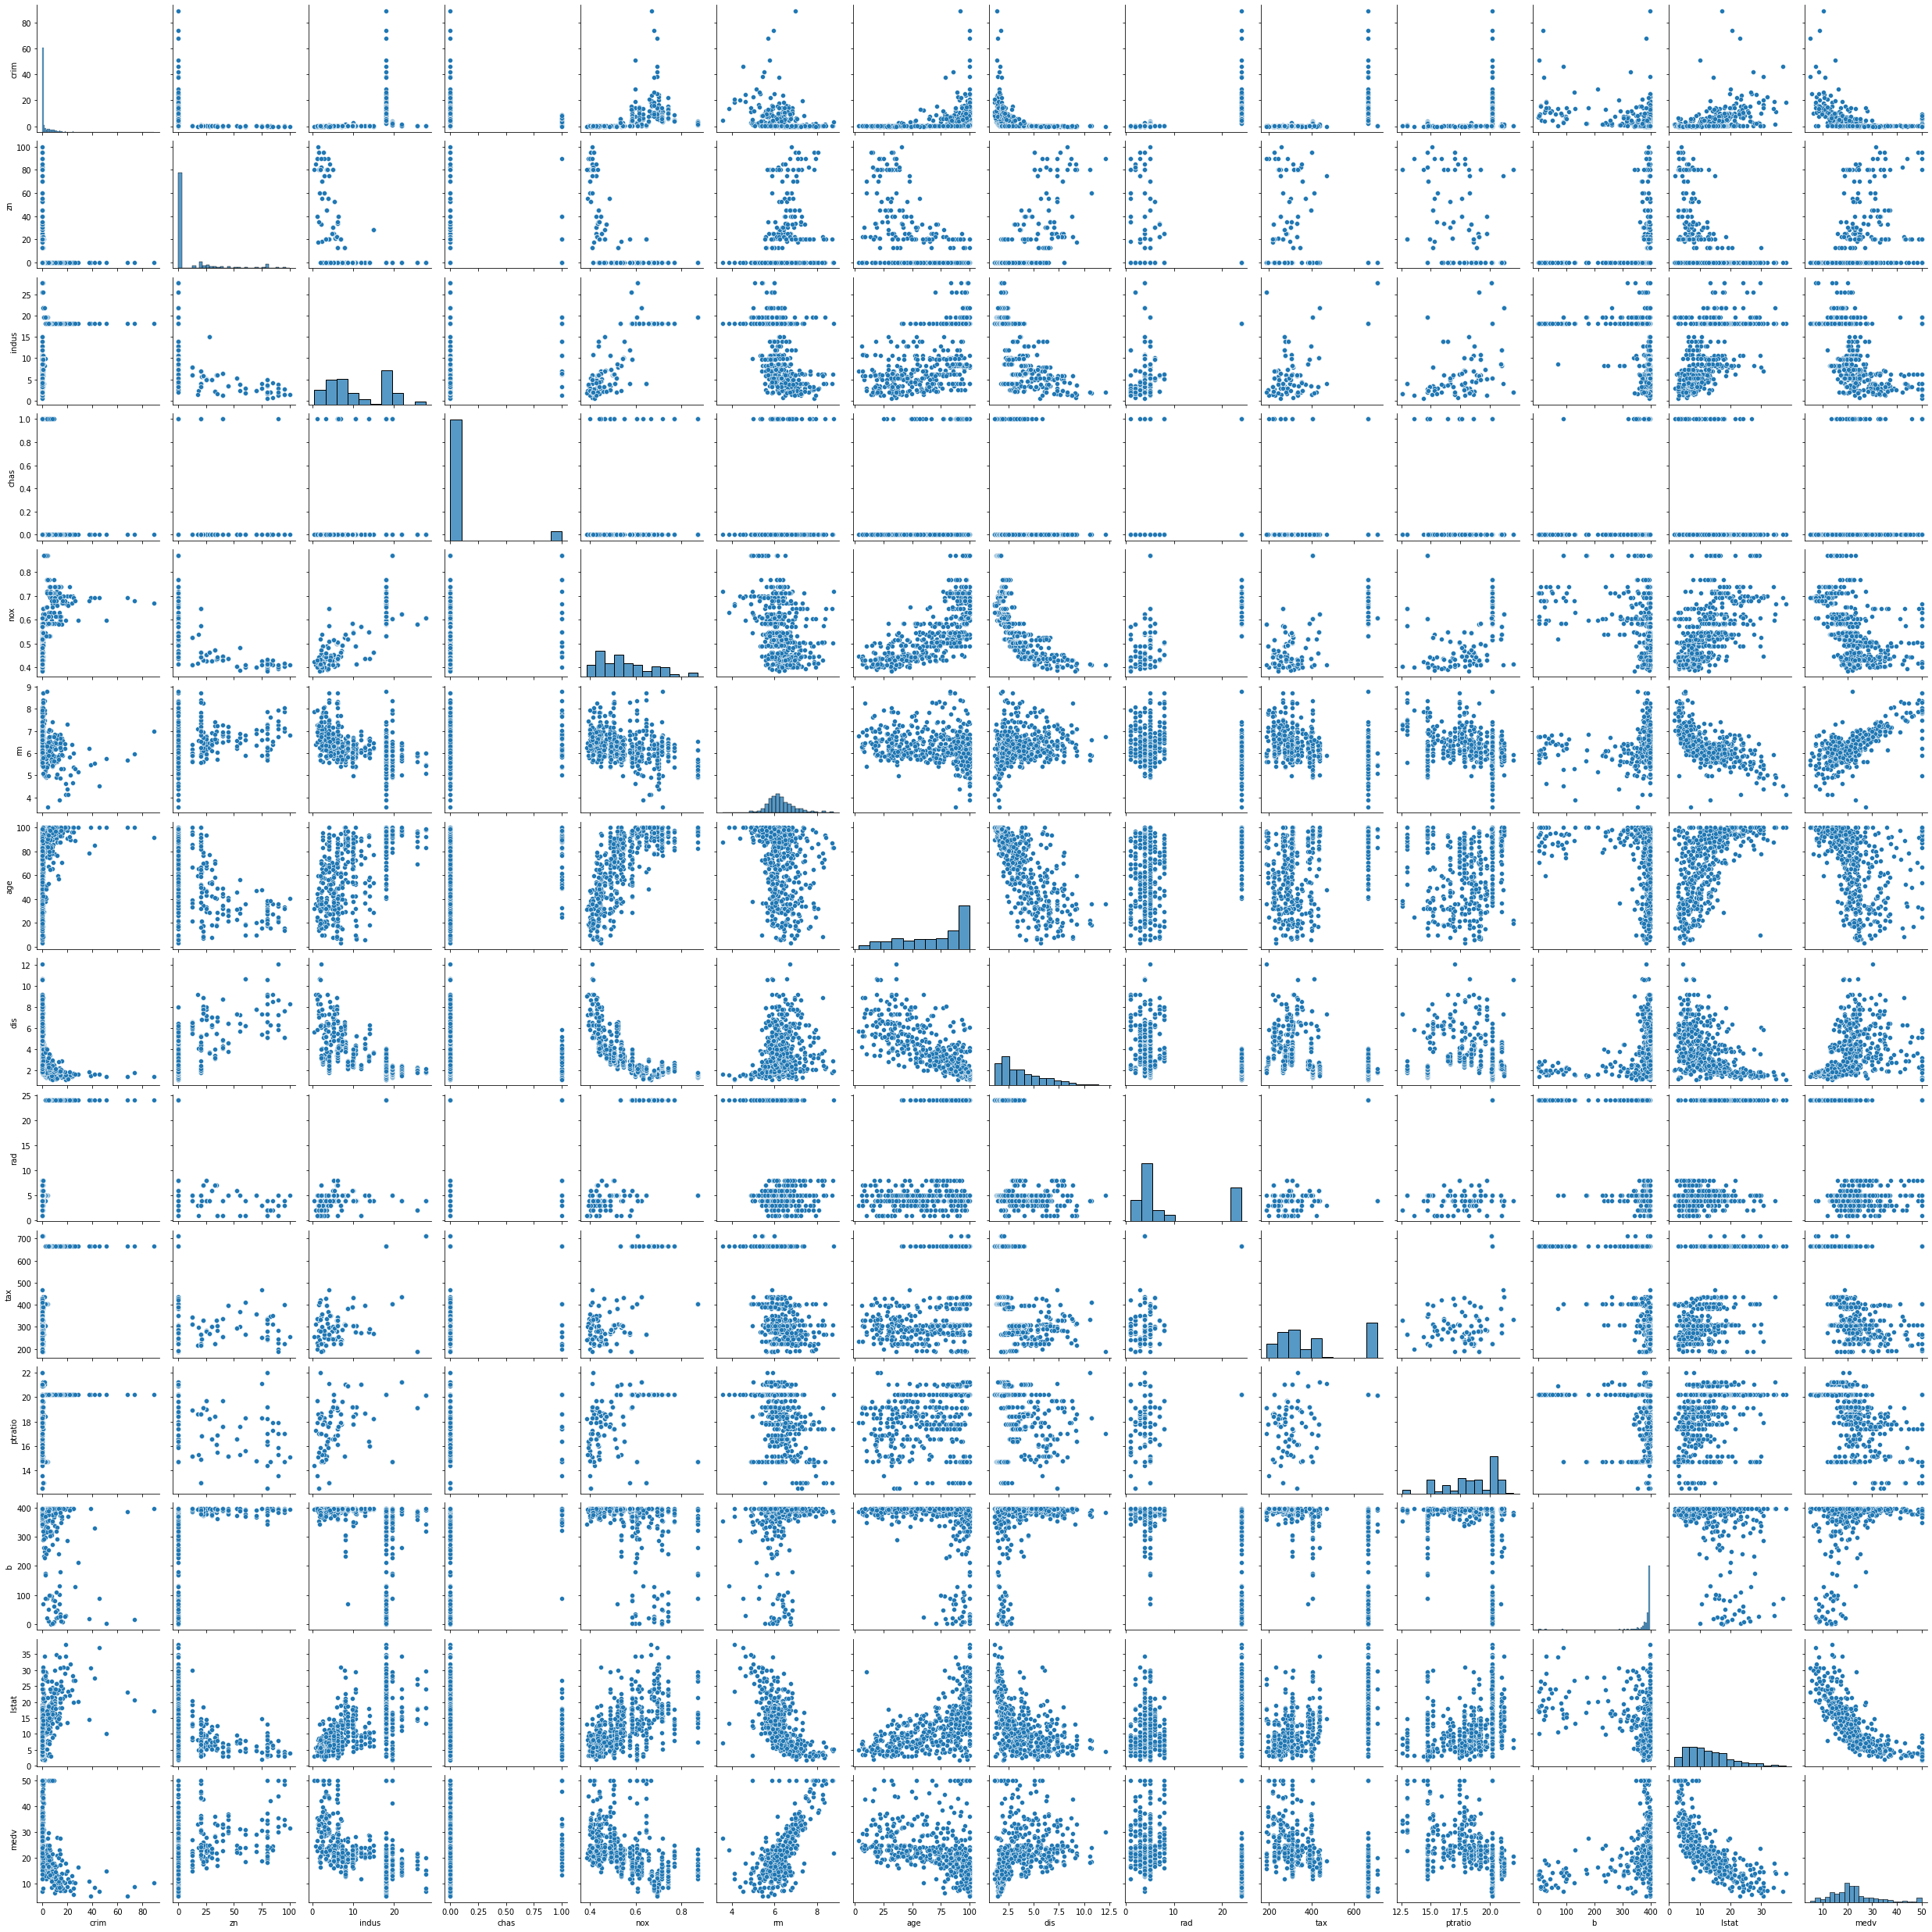

In [9]:
sns.pairplot(df)

Check the correlation between all pairs of features. Draw a heatmap containing these values. **(S1-8: 5 points)**

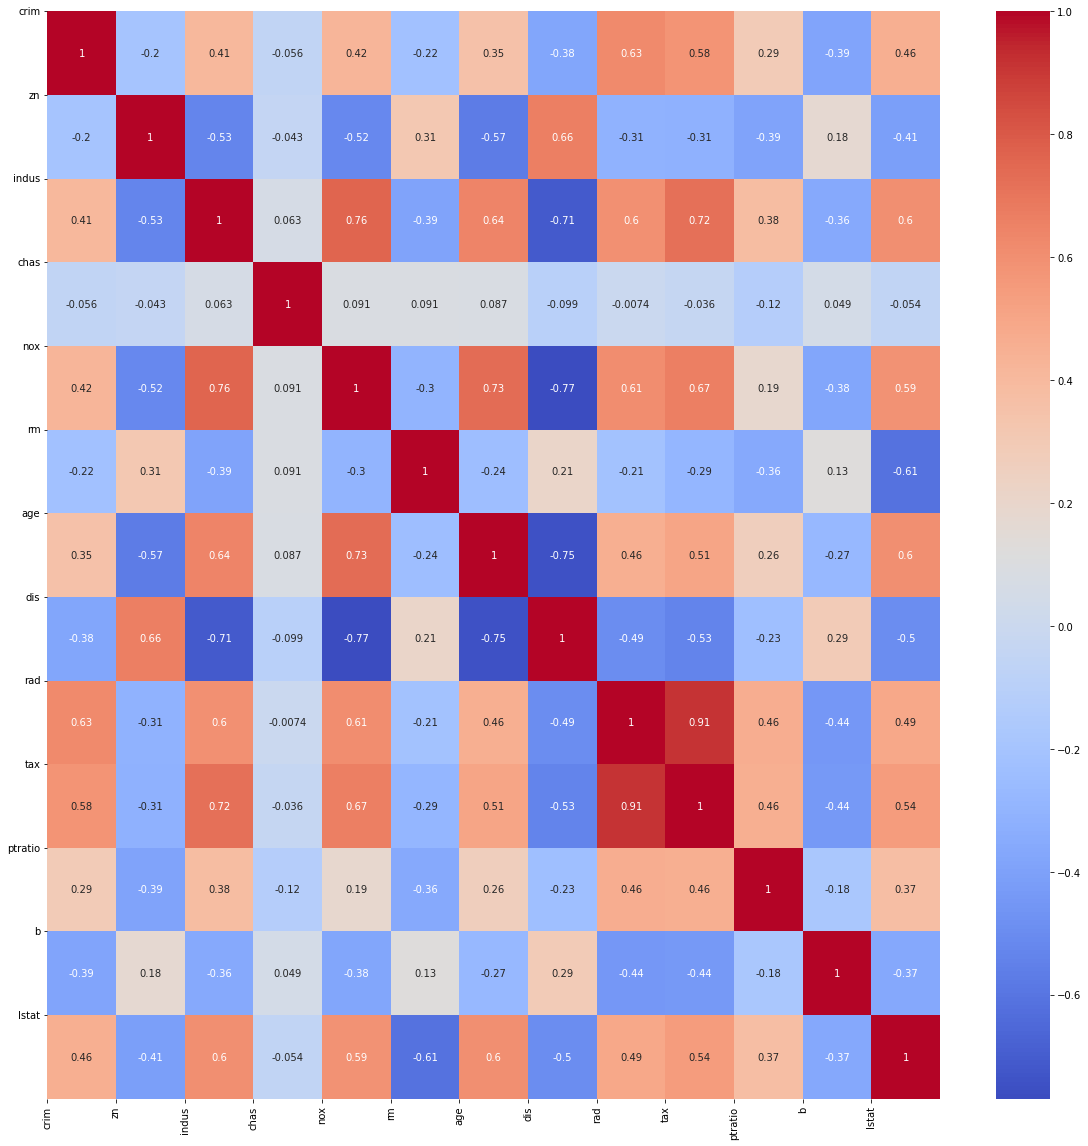

In [34]:
# medv column is not included
sns.heatmap(pd.DataFrame(X).corr(), annot=True, cmap='coolwarm')
plt.rcParams['figure.figsize'] = (20, 20)
plt.xticks(range(len(df.columns) - 1), df.columns[:-1], rotation=90)
plt.yticks(range(len(df.columns) - 1), df.columns[:-1], rotation=0)
plt.show()

Based on the correlation matrix, reduce the number of features to 10. **(S1-9: 5 points)**

In [9]:
correlation_matrix = pd.DataFrame(X).corr().values
num_features = len(correlation_matrix)
remaining_features = list(range(num_features))
while len(remaining_features) > 10:
    max_corr = 0
    for i, j in itertools.combinations(remaining_features, 2):
        if abs(correlation_matrix[i][j]) > abs(max_corr):
            max_corr = correlation_matrix[i][j]
            max_j = j
    remaining_features.remove(max_j)
X = X[:, remaining_features]

# Sec 2: Data Manipulation and Feature Extraction (10)

Split the dataframe into training and evaluation sets (called `(x_train, y_train)` and `(x_eval, y_eval)`) **(S2-1: 2 points)**

In [10]:
# I call x_eval as X_test and y_eval as y_test
X_train, X_test, y_train, y_test = train_test_split(X, df['medv'], test_size=0.2, random_state=42)

Manipulate the training data to make it have unit variance and zero mean **(S2-2: 5 points)**

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Normalize the evaluation set accordingly **(S2-3: 3 points)**

In [12]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# Sec 3: Fitting Models

In this part, we are going to use "pipelines" which are built inside `sklearn`. You are advised to familiarize yourself with them using the following link:
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

## A: Polynomial Regression (30)

Create 3 pipelines for polynomial regression of different arbitrary degrees. **(S3-1: 5 points)**

In [13]:
degrees = [2, 3, 6]
model1 = make_pipeline(PolynomialFeatures(degrees[0]), LinearRegression())
model1.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [14]:
model2 = make_pipeline(PolynomialFeatures(degrees[1]), LinearRegression())
model2.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [15]:
model3 = make_pipeline(PolynomialFeatures(degrees[2]), LinearRegression())
model3.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

Calculate both the training and evaluation MSE error for each of the models. Finally, store these values in two lists, one containing the error values for the training set and the other one holding the same values for the evaluation set. **(S3-2: 10 points)**

In [16]:
training_error = []
test_error = []
for model in [model1, model2, model3]:
    training_error.append(mean_squared_error(y_train, model.predict(X_train)))
    test_error.append(mean_squared_error(y_test, model.predict(X_test)))

In [17]:
training_error, test_error

([8.08661393412269, 2.0501868033906594, 1.432854325017868e-22],
 [4.224007686852443e+22, 4.0233803012354566e+23, 197409.9714687882])

Plot the degree of the polynomials versus the corresponding MSE errors **(S3-3: 10 points)**

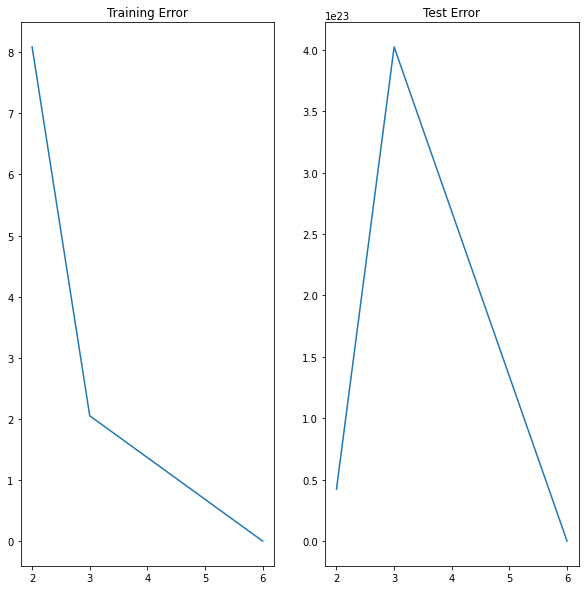

In [18]:
plt.rcParams['figure.figsize'] = (10, 10)
fig, axes = plt.subplots(1, 2)
axes[0].plot(degrees, training_error)
axes[0].set_title('Training Error')
axes[1].plot(degrees, test_error)
axes[1].set_title('Test Error')
plt.show()


What is your conclusion? **(S3-4: 5 points)**

همانطور که انتظار داریم با افزایش پیچیدگی، خطای آموزش نیز کاهش می‌یابد زیرا مدل پیجیده‌تر می‌شود و بهتر می‌تواند الگو‌های موجود در داده را کشف کند.  
ولی در خطای تست مورد دیگری مشاهده می‌شود که با افزایش پیچیدگی خطا ابتدا افزایش و سپس کاهش می‌یابد که با قاعده تریدآف بایاس-واریانس در تضاد است.  
در حالت معمول انتظار داریم که اگر از نقطه بهینه گذشته باشیم، با افزایش پیچیدگی خطای تست افزایش یابد ولی در اینجا ما در درجه ۳ تا حد خوبی به درون‌یابی نزدیک شده‌ایم ولی در خطای تست بعد از این نقطه به جای اینکه خطا افزایش یابد، کاهش می‌یابد.  
این یک پدیده به نام double descent است که در سال ۲۰۱۹ کشف شد.  
for more info click [here](https://en.wikipedia.org/wiki/Double_descent)

## B: Splines (30)

Create pipelines for spline regression based on all combinations of values for degree and the number of knots **(S3-5: 5 points)**

In [29]:
degrees = [2, 3, 6]
n_knots = [3, 5, 10]
models = []
for degree, n_knot in itertools.product(degrees, n_knots):
    models.append(make_pipeline(SplineTransformer(n_knots=n_knot, degree=degree), LinearRegression()))

In [30]:
for model in models:
    model.fit(X_train, y_train)

Calculate both the training and evaluation MSE error for each of models and store them in the corresponding pipelines. **(S3-6: 10 points)**

Note: A pipeline is a `dict` object. So, to store something in it, you have to consider a "key" and a "value".

In [31]:
training_error = []
test_error = []
for model in models:
    training_error.append(mean_squared_error(y_train, model.predict(X_train)))
    test_error.append(mean_squared_error(y_test, model.predict(X_test)))

training_error, test_error

([16.54426564433787,
  13.5363011305403,
  11.621187466158725,
  14.574674084351795,
  12.520490970422726,
  11.359251029137335,
  12.09466716955204,
  11.209118572272876,
  9.493136600409406],
 [4.5830970982588744e+18,
  2.2318717671947303e+22,
  2.454346683873616e+24,
  421.3467470894608,
  28616.921156125536,
  8.028489866779025e+19,
  2.4077230442841944e+19,
  4278780816800297.5,
  6345265385018.326])

Plot the joint distribution of training and eval error based on degree and knots **(S3-7: 10 points)**

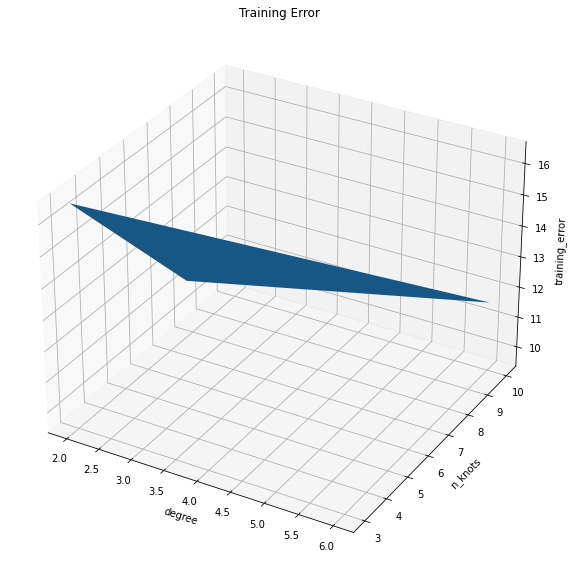

In [41]:
import numpy as np
x_axis = np.array(degrees)
y_axis = np.array(n_knots)
z_axis = np.array(training_error)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x_axis, y_axis, z_axis)
ax.set_xlabel('degree')
ax.set_ylabel('n_knots')
ax.set_zlabel('training_error')
plt.title('Training Error')
plt.show()

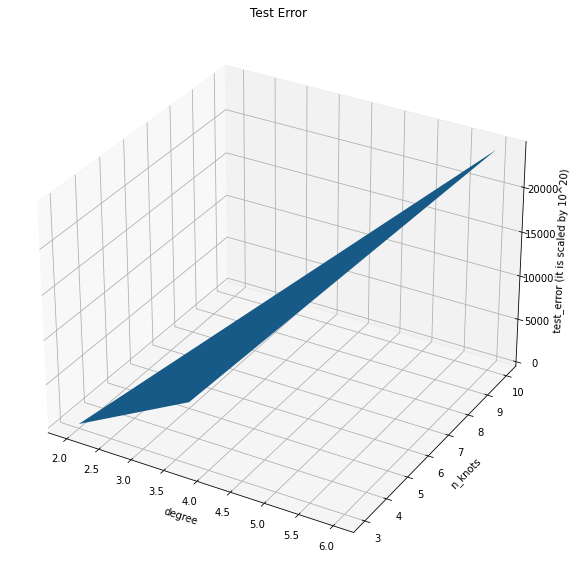

In [51]:
x_axis = degrees
y_axis = n_knots
z_axis = test_error
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# test error is scaled by 10^20 
z_axis = [z / 10**20 for z in z_axis]
ax.plot_trisurf(x_axis, y_axis, z_axis)
ax.set_xlabel('degree')
ax.set_ylabel('n_knots')
ax.set_zlabel('test_error (it is scaled by 10^20)')
plt.title('Test Error')
plt.show()

What is your conclusion? **(S3-8: 5 points)**

مشابه قسمت قبل با افزایش پیچیدگی خطای آموزش کاهش می‌یابد ولی خطای تست ابتدا افزایش و سپس کاهش می‌یابد که با قاعده تریدآف بایاس-واریانس در تضاد است.  
وقتی از نقطه درون‌یابی گذر می‌کنیم با افزایش پیجیدگی خطای تست کاهش می‌یابد که با پدیده  توجیه می‌شود. double descent